### 1. Importing dependencies

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.model_selection import train_test_split

In [2]:
# dataset
df = pd.read_csv("assests/housing.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")
df.head()

There are 20640 rows and 10 columns in the dataset.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
# null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
# imputing null values
clean_df = df.fillna(df.median())
clean_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [7]:
def feature_engineer(data):
    # Rooms per Bedroom 
    data['rooms_bedroom_ratio'] = data['total_rooms'] / data['total_bedrooms']
    
    # Population per Bedroom
    data['population_per_household'] = data['population'] / data['households']
    
    # Average Rooms per Household
    data['avg_rooms_per_household'] = data['total_rooms'] / data['households']
    
    # Income per capita
    data['income_per_capita'] = data['median_income'] / data['population']
    
    # Age-to-Income
    data['median_age_income_ratio'] = data['housing_median_age'] / data['median_income']
    
    # Bedrooms per Household
    data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']

In [8]:
feature_engineer(clean_df)
clean_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,6.821705,2.555556,6.984127,0.025855,4.924807,1.023810
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,6.418626,2.109842,6.238137,0.003457,2.529694,0.971880
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,7.721053,2.802260,8.288136,0.014632,7.165100,1.073446
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,5.421277,2.547945,5.817352,0.010113,9.214793,1.073059
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,5.810714,2.181467,6.281853,0.006807,13.519838,1.081081


In [9]:
# check for null values
clean_df.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
median_house_value          0
rooms_bedroom_ratio         0
population_per_household    0
avg_rooms_per_household     0
income_per_capita           0
median_age_income_ratio     0
bedrooms_per_household      0
dtype: int64

### 2. Preliminary Data Analysis

In [10]:
num_df = clean_df.loc[:, clean_df.nunique() > 5]
num_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,6.821705,2.555556,6.984127,0.025855,4.924807,1.023810
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,6.418626,2.109842,6.238137,0.003457,2.529694,0.971880
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,7.721053,2.802260,8.288136,0.014632,7.165100,1.073446
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,5.421277,2.547945,5.817352,0.010113,9.214793,1.073059
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,5.810714,2.181467,6.281853,0.006807,13.519838,1.081081


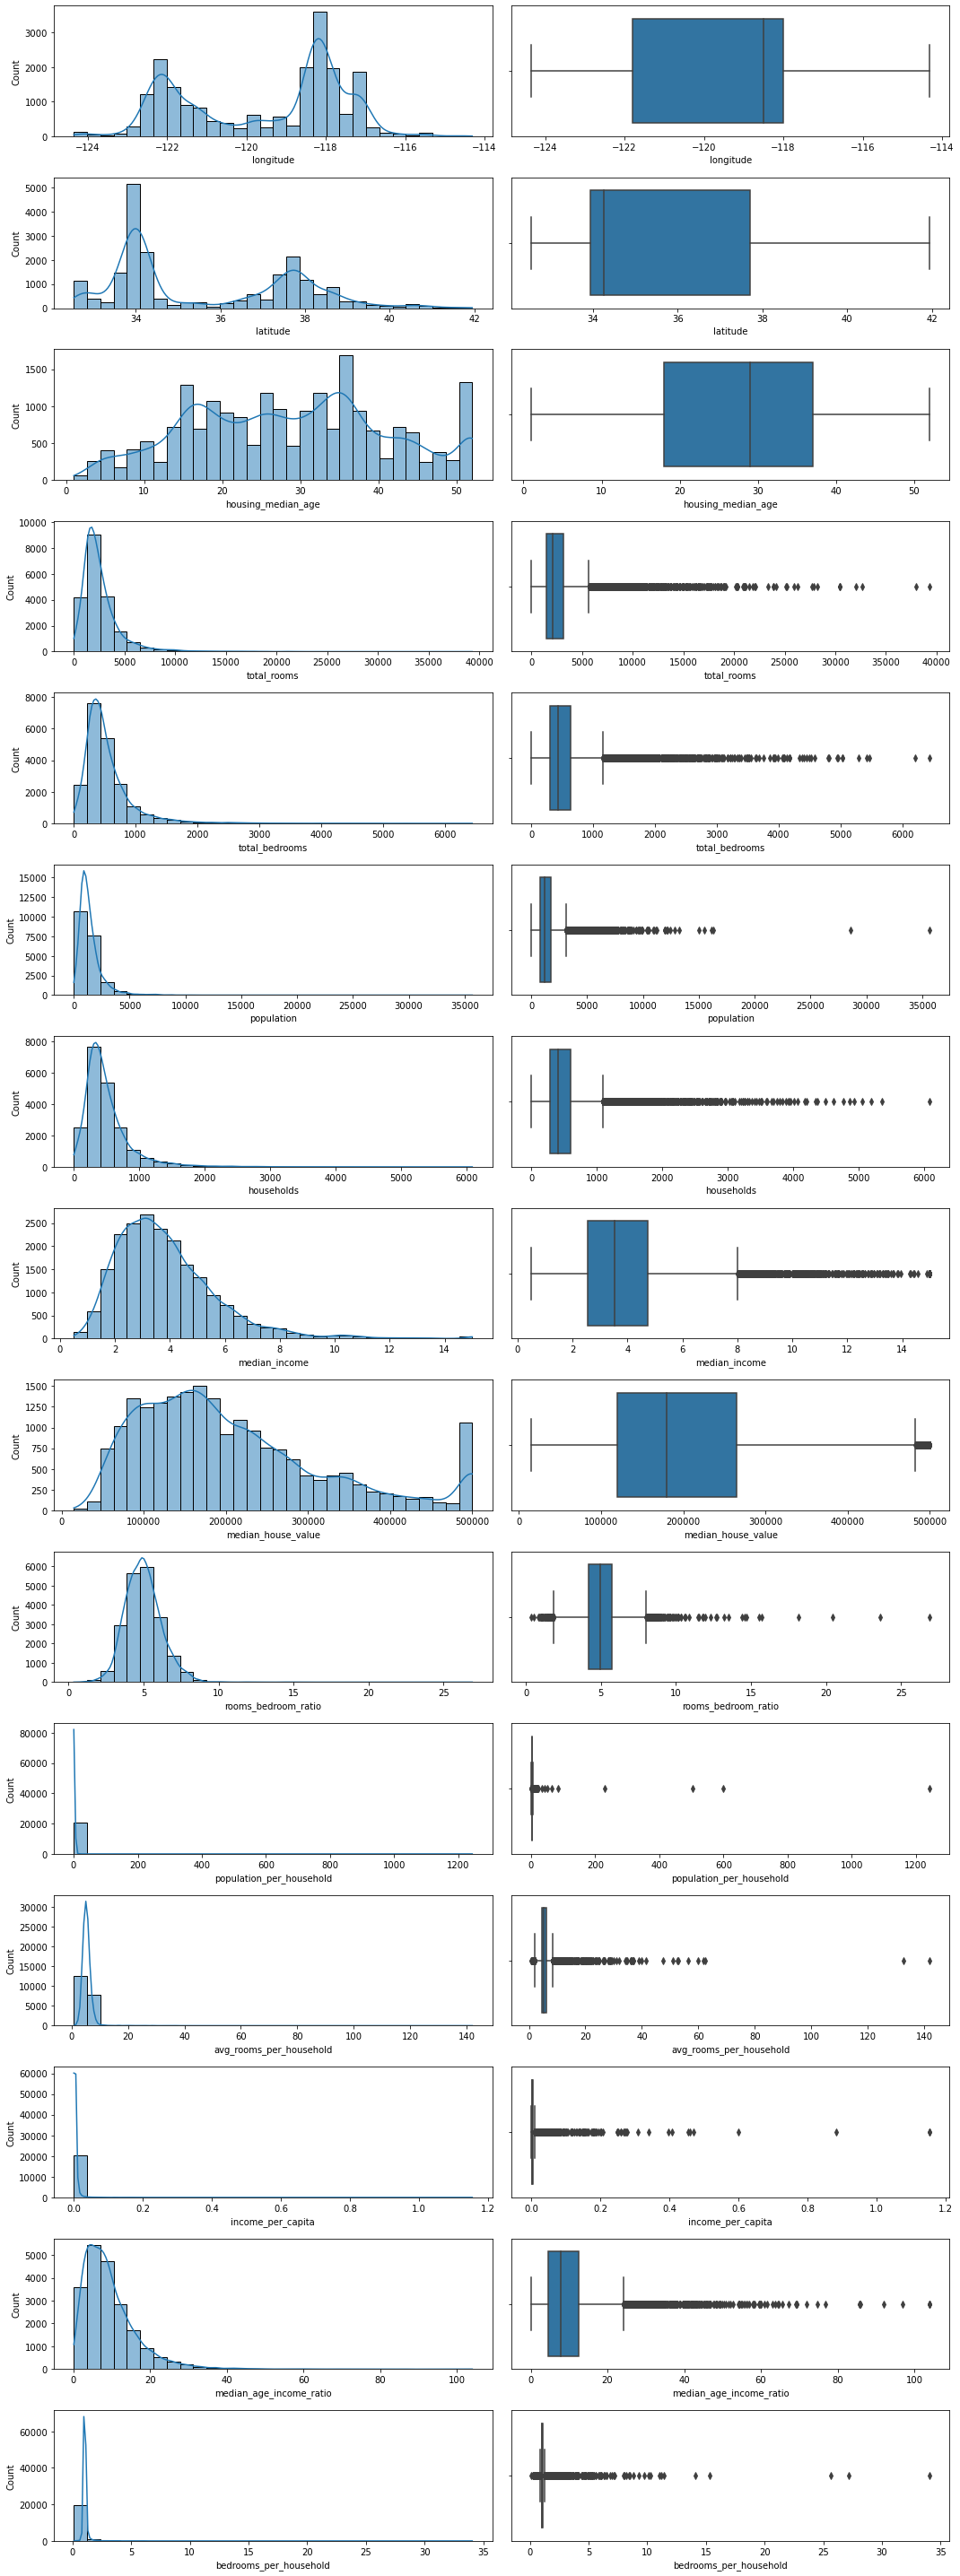

In [11]:
nrows, ncols = len(num_df.columns), 2
fig, ax = plt.subplots(nrows, ncols, figsize = (15, 40))

for idx, col in enumerate(num_df.columns):
    
    plt.subplot(nrows, ncols, ncols*idx+1)
    sns.histplot(data = num_df, x = col, bins = 30, kde = True)
    
    plt.subplot(nrows, ncols, ncols*idx+2)
    sns.boxplot(data = num_df, x = col, orient = True)
    
fig.tight_layout()
plt.show()

In [12]:
clean_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'rooms_bedroom_ratio',
       'population_per_household', 'avg_rooms_per_household',
       'income_per_capita', 'median_age_income_ratio',
       'bedrooms_per_household'],
      dtype='object')

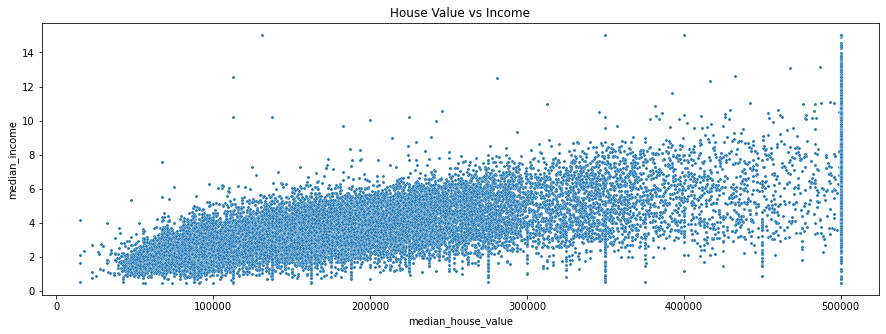

In [13]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x=clean_df.median_house_value, y=clean_df.median_income, s=10)
plt.title("House Value vs Income")
plt.show()

Text(0.5, 1.0, 'Income age ratio vs House value')

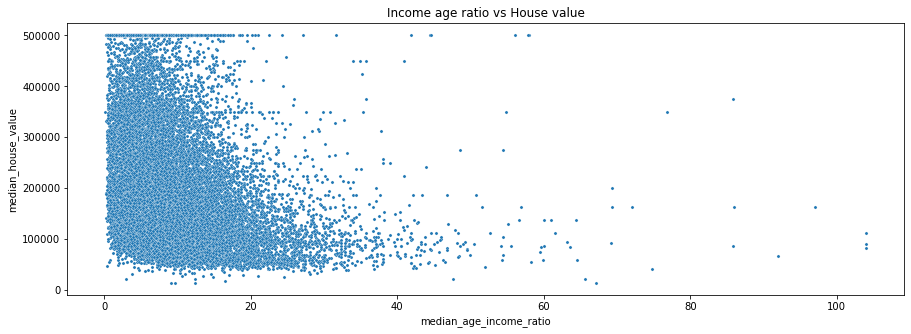

In [14]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = clean_df.median_age_income_ratio, y = clean_df.median_house_value, s = 10)
plt.title("Income age ratio vs House value")

In [15]:
clean_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

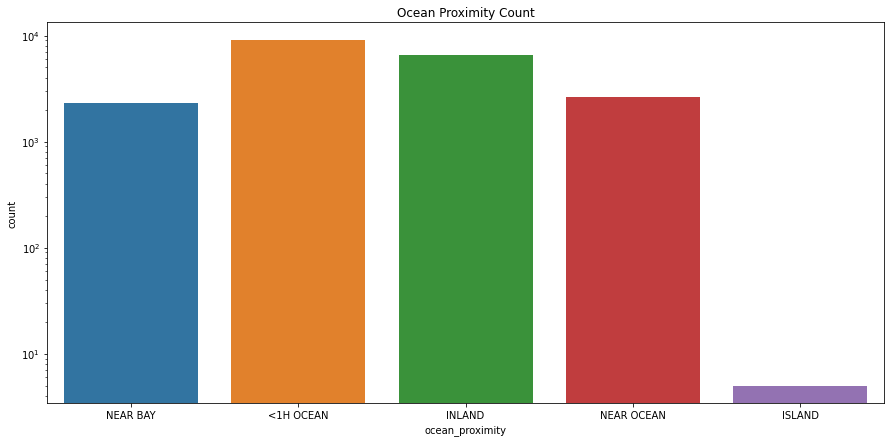

In [16]:
plt.figure(figsize = (15, 7))
g = sns.countplot(data = clean_df, x = 'ocean_proximity')
g.set_yscale('log')
plt.title("Ocean Proximity Count")
plt.show()

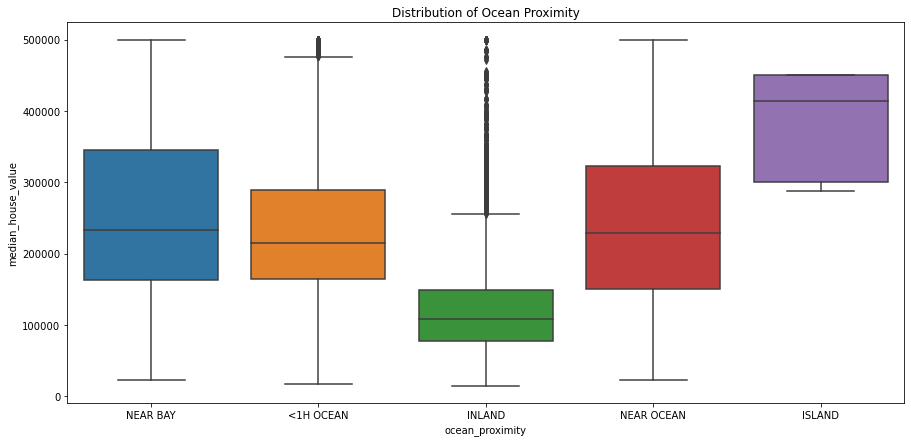

In [17]:
plt.figure(figsize = (15, 7))
sns.boxplot(x=clean_df.ocean_proximity, y=clean_df.median_house_value)
plt.title("Distribution of Ocean Proximity")
plt.show()

There are plenty of outliers in the INLAND category. Let's check it out by getting the values greater than the maximum value of the INLAND box plot.

In [18]:
# Get maximum of 'INLAND' boxplot
inland_mhv = clean_df['median_house_value'][clean_df['ocean_proximity'] == 'INLAND']

Q1 = inland_mhv.quantile(0.25) # lower quartile
Q3 = inland_mhv.quantile(0.75) # upper quartile
IQR = Q1 - Q3 # interquartile range

# maximum
MAX = Q3 + (1.5 * IQR) 

print(f"INLAND Boxplot's Maximum is {MAX}\n")

# Get INLAND outliers
inland_outliers = clean_df[(clean_df['median_house_value'] > MAX) & (clean_df['ocean_proximity'] == 'INLAND')]
inland_outliers

INLAND Boxplot's Maximum is 41775.0



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household
954,-121.92,37.64,46,1280,209.0,512,208,5.1406,INLAND,315600,6.124402,2.461538,6.153846,0.010040,8.948372,1.004808
957,-121.90,37.66,18,7397,1137.0,3126,1115,6.4994,INLAND,323000,6.505717,2.803587,6.634081,0.002079,2.769486,1.019731
965,-121.88,37.68,23,2234,270.0,854,286,7.3330,INLAND,337200,8.274074,2.986014,7.811189,0.008587,3.136506,0.944056
967,-121.88,37.67,16,4070,624.0,1543,577,6.5214,INLAND,311500,6.522436,2.674177,7.053726,0.004226,2.453461,1.081456
968,-121.88,37.67,25,2244,301.0,937,324,6.4524,INLAND,296900,7.455150,2.891975,6.925926,0.006886,3.874527,0.929012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,4.451872,2.560606,5.045455,0.001847,16.022560,1.133333
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,4.646667,3.122807,6.114035,0.007182,7.040050,1.315789
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,4.647423,2.325635,5.205543,0.001688,10.000000,1.120092
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,4.547677,2.123209,5.329513,0.002520,9.640103,1.171920


In [19]:
(inland_outliers.shape[0]/clean_df.shape[0]) * 100

31.540697674418606

The INLAND outliers take up almost 32% of the data.

Let's compare the INLAND outliers statistics against other houses that are near the ocean whose median house value is **greater than the maximum** (41775.0) of INLAND houses.

In [20]:
# Getting all non-INLAND houses whose MHV is above 41775.0
non_inland = clean_df[(clean_df['median_house_value'] > MAX) & ~(clean_df['ocean_proximity'] == 'INLAND')].describe().T['mean']

inland = inland_outliers.describe().T['mean']

inland_comp = pd.DataFrame([non_inland, inland], columns = inland.index)
inland_comp.index = ['non_inland', 'inland']

inland_comp = inland_comp.T
inland_comp['difference'] = inland_comp['non_inland'] - inland_comp['inland']
inland_comp['increase (%)'] = ((inland_comp['non_inland'] - inland_comp['inland'])/inland_comp['inland'])*100

inland_comp

,non_inland,inland,difference,increase (%)
longitude,-119.492909,-119.737492,0.244583,-0.204266
latitude,35.119616,36.733501,-1.613884,-4.393494
housing_median_age,30.665885,24.247926,6.417959,26.468074
total_rooms,2597.479864,2724.912903,-127.433040,-4.676591
total_bedrooms,538.537467,534.083257,4.454211,0.833992
population,1440.804034,1393.652995,47.151039,3.383270
households,509.770935,478.662980,31.107955,6.498927
median_income,4.179786,3.217191,0.962595,29.920343
median_house_value,245158.728461,125381.540246,119777.188215,95.530162
rooms_bedroom_ratio,4.944996,5.108520,-0.163525,-3.201015


Compared to near-ocean houses in the same median house value range, on average, the outlier `INLAND` houses:

- are relatively new (by roughly 6 years and 4 months),
- are 96% cheaper than non-inland houses,
- people who live in them earn 6.5% less than non-inland house owners,
- are seemingly larger than non-inland houses indicated by their greater average bedroom size and average number of rooms per household (3.4% larger bedrooms and 13.4% more rooms respectively).

In [21]:
# Ordinal mapping for ocean_proximity
prox_mapping = {'NEAR BAY' : 2, '<1H OCEAN' : 4, 'INLAND' : 5, 'NEAR OCEAN' : 3, 'ISLAND' : 1}

ocean_prox = clean_df['ocean_proximity']
clean_df_copy = clean_df.drop('ocean_proximity', axis = 1)
clean_df_copy['ocean_proximity'] = ocean_prox.map(prox_mapping)
clean_df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,6.821705,2.555556,6.984127,0.025855,4.924807,1.023810,2
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,6.418626,2.109842,6.238137,0.003457,2.529694,0.971880,2
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,7.721053,2.802260,8.288136,0.014632,7.165100,1.073446,2
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,5.421277,2.547945,5.817352,0.010113,9.214793,1.073059,2
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,5.810714,2.181467,6.281853,0.006807,13.519838,1.081081,2


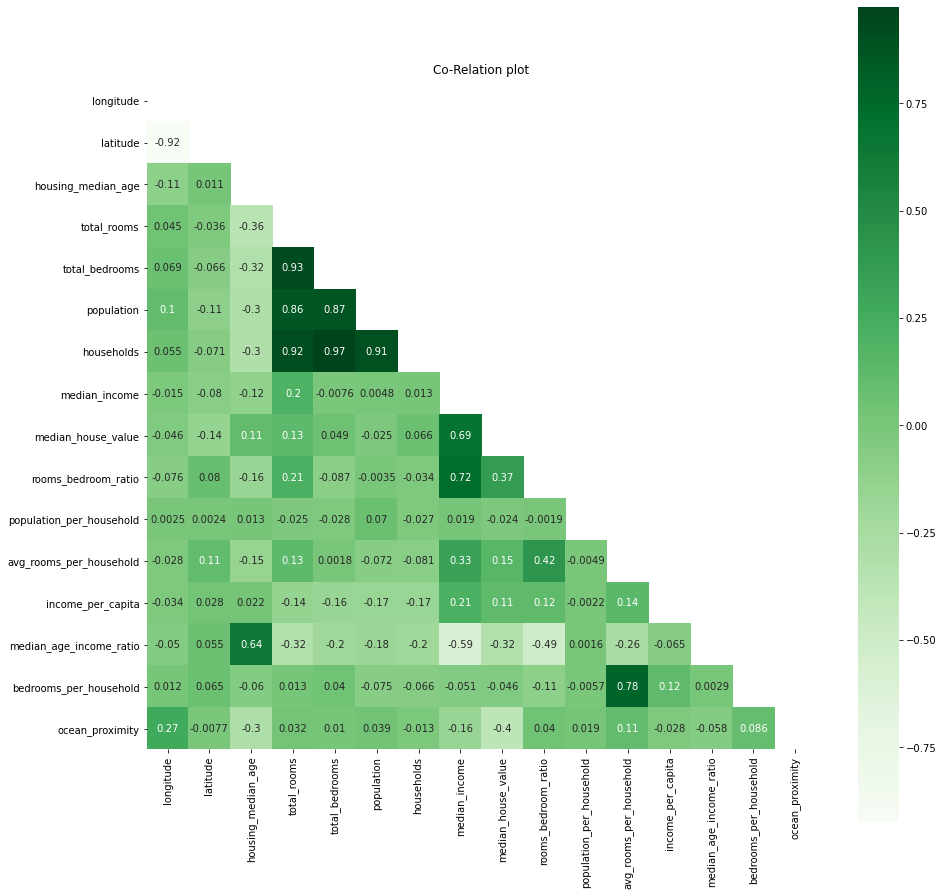

In [22]:
plt.figure(figsize = (15, 15))

mask = np.triu(pd.get_dummies(clean_df_copy).corr())
sns.heatmap(pd.get_dummies(clean_df_copy).corr(),\
            mask = mask, annot = True, \
            square = True, cmap = 'Greens')

plt.title("Co-Relation plot")
plt.show()

In [23]:
len(clean_df_copy.columns), len(clean_df.columns)


(16, 16)

In [24]:
pd.get_dummies(clean_df_copy).corr()['median_house_value']

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
total_rooms                 0.134153
total_bedrooms              0.049457
population                 -0.024650
households                  0.065843
median_income               0.688075
median_house_value          1.000000
rooms_bedroom_ratio         0.367217
population_per_household   -0.023737
avg_rooms_per_household     0.151948
income_per_capita           0.114455
median_age_income_ratio    -0.320028
bedrooms_per_household     -0.045637
ocean_proximity            -0.397251
Name: median_house_value, dtype: float64

<AxesSubplot:>

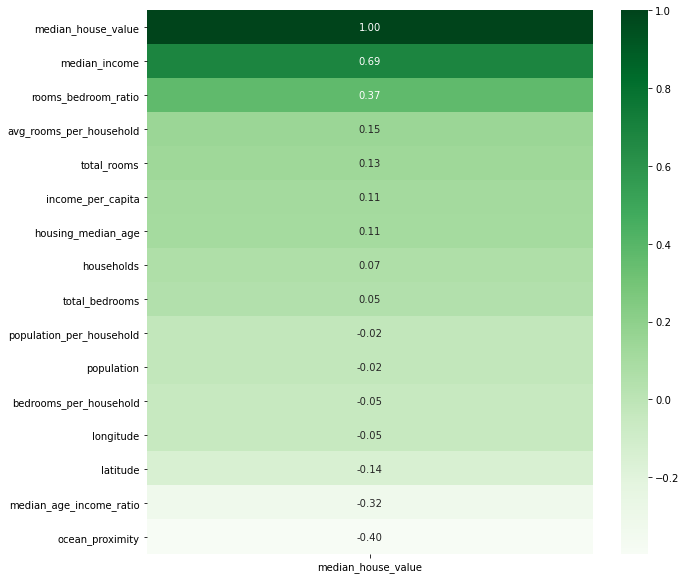

In [25]:
plt.figure(figsize = (10, 10))
mhv_corr = pd.get_dummies(clean_df_copy).corr()['median_house_value'].sort_values(ascending = False).to_frame()
sns.heatmap(mhv_corr, annot = True, cmap = 'Greens', fmt = '.2f', annot_kws = {'size' : 10})

### 3. Modeling

In [26]:
# Set features and labels
X = clean_df.drop('median_house_value', axis = 1)
y = clean_df['median_house_value']

X.shape, y.shape

((20640, 15), (20640,))

In [27]:
# Encode categorical columns
encoder = make_column_transformer((OrdinalEncoder(), ['ocean_proximity']), 
                                  remainder = 'passthrough')

X_encoded = encoder.fit_transform(X)
y = np.array(y)

X_encoded.shape, y.shape

((20640, 15), (20640,))

In [28]:
random_seed = 42 # Set random seed for reproducibility
lr = LinearRegression()
base_models = [('LinearRegression', lr)]

### Error Metrics

In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

### Model Scores

In [30]:
# Initialize the scores DataFrame
scores = pd.DataFrame(columns=['Model', 'MAE_Train', 'MSE_Train', 'RMSE_Train', 'MAPE_Train',
                               'MAE_Test', 'MSE_Test', 'RMSE_ Test', 'MAPE_Test', 'R^2'])

In [31]:
def get_metrics(train_act, train_pred, test_act, test_pred, model_description, scores_df):

    '''
    Function to evaluate the model performance by caluculating their
            1. mean absolute error
            2. mean squared error
            3. root mean squared error
            4. mean absolute percentage error
    Parameter
    --------
    train_act : array,
        acutal training sets
    train_pred : array,
        predicted train set
    test_act : array,
        actual training sets
    test_pred : array,
        predicted training sets
    model_description : str,
        name of the model
    scores_df : dataframe
        performance metrics dataframe
    '''
    # print(scores_df.columns)
    MAE_Train = metrics.mean_absolute_error(train_act, train_pred)
    MSE_Train = metrics.mean_squared_error(train_act, train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act, train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act, train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act, test_pred)
    MSE_Test = metrics.mean_squared_error(test_act, test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act, test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act, test_pred)
    R2 = metrics.r2_score(train_act, train_pred)
    s1 = pd.Series([model_description, MAE_Train, MSE_Train, RMSE_Train, MAPE_Train, MAE_Test, MSE_Test, RMSE_Test, MAPE_Test, R2], index=scores_df.columns)
    # print(s1)
    scores_df = scores_df.append(s1, ignore_index=True)
    return scores_df

### 3.1 Cross-Validation

In [32]:
# Assuming X and y are your data and target variables
# Assuming kf is your KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate cross-validation scores
performance_scores = cross_val_score(linear_model.LinearRegression(), X_encoded, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate root mean squared error (RMSE)
def rmse(x):
    return np.sqrt(-x)

# rmse_scores = rmse(performance_scores)

In [33]:
# Calculate mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    return metrics.mean_absolute_percentage_error(y_true, y_pred)

# Create an empty list to store MAPE scores
mape_scores = []
cnt = 1

# Loop through each fold
for train_idx, test_idx in kf.split(X_encoded):
    X_train, X_test = X_encoded[train_idx], X_encoded[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # fold_mape = mape(y_test, y_pred)
    # mape_scores.append(fold_mape)

    scores = get_metrics(y_train, model.predict(X_train), y_test, model.predict(X_test), f"K-Fold {cnt}", scores)
    cnt += 1

scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924


### 3.2 Recursive Feature Elimination

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
X = num_df.drop('median_house_value', axis = 1)
y = num_df['median_house_value']

# splitting into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Create an RFE selector with the linear regression model and desired number of features
rfe = RFE(model)

# Fit the RFE selector to the data
rfe.fit(X_train, y_train)

# Print the selected features' ranking and support
print("Feature Ranking:", rfe.ranking_)
print("Selected Features Support:",rfe.support_)

Feature Ranking: [1 1 2 8 6 5 4 1 1 7 1 1 3 1]
Selected Features Support: [ True  True False False False False False  True  True False  True  True
 False  True]


In [36]:
# Transform the test data to keep only the selected features
X_test_selected = rfe.transform(X_test)

# Selecting reaquired feature in the train data
X_train_selected = rfe.transform(X_train)

# Train the model on the reduced feature set
model.fit(X_train_selected, y_train)

# Make predictions on both train and test sets
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

In [37]:
# Calculate and store metrics
scores = get_metrics(y_train, y_train_pred, y_test, y_test_pred, "RFE", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924
5,RFE,53187.531706,5.289753e+09,72730.689326,0.310855,54206.789975,5.665801e+09,75271.516189,0.319014,0.605153


### Check for multi collinearity using VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
def calc_vif(clean_df):
    X = clean_df.drop(['median_house_value'], axis=1)
    # Ensure that X contains only numerical data
    numeric_columns = X.select_dtypes(include=[np.number])

    # Standardize the data before calculating VIF
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_columns)

    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_columns.columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

    # Display the VIF values
    return vif_data

In [40]:
calc_vif(clean_df)

,feature,VIF
0,longitude,9.241353
1,latitude,9.578981
2,housing_median_age,2.303994
3,total_rooms,20.219505
4,total_bedrooms,48.876391
5,population,6.719683
6,households,38.191204
7,median_income,3.493435
8,rooms_bedroom_ratio,6.595970
9,population_per_household,1.063059


we have found out using VIF there is high multi-colinearlity between the attributes.

using the VIF score, we dropped the attributes whose **VIF score > 10** 

In [41]:
X_vif = clean_df.drop(['total_rooms','total_bedrooms','households'], axis=1)
calc_vif(X_vif)

,feature,VIF
0,longitude,8.993150
1,latitude,9.346208
2,housing_median_age,2.284956
3,population,1.166954
4,median_income,3.387186
5,rooms_bedroom_ratio,4.185833
6,population_per_household,1.008719
7,avg_rooms_per_household,7.300165
8,income_per_capita,1.107054
9,median_age_income_ratio,3.112059


### 3.3 RFE after Variance Inflation Factor

In [42]:
num_df_after_vif = X_vif.loc[:, X_vif.nunique() > 5]
num_df_after_vif.head()

X = num_df_after_vif.drop('median_house_value', axis = 1)
y = num_df_after_vif['median_house_value']

# splitting into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Create an RFE selector with the linear regression model and desired number of features
rfe = RFE(model)

# Fit the RFE selector to the data
rfe.fit(X_train, y_train)

# Print the selected features' ranking and support
print("Feature Ranking:", rfe.ranking_)
print("Selected Features Support:",rfe.support_)

# Transform the test data to keep only the selected features
X_test_selected = rfe.transform(X_test)

# Selecting reaquired feature in the train data
X_train_selected = rfe.transform(X_train)

# Train the model on the reduced feature set
model.fit(X_train_selected, y_train)

# Make predictions on both train and test sets
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

# Calculate and store metrics
scores = get_metrics(y_train, y_train_pred, y_test, y_test_pred, "RFE-VIF", scores)
scores

Feature Ranking: [1 1 4 7 1 1 6 3 1 5 2]
Selected Features Support: [ True  True False False  True  True False False  True False False]


,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924
5,RFE,53187.531706,5.289753e+09,72730.689326,0.310855,54206.789975,5.665801e+09,75271.516189,0.319014,0.605153
6,RFE-VIF,53497.510668,5.357175e+09,73192.727028,0.312718,54289.058304,5.581157e+09,74707.139538,0.320552,0.600120


### 3.4 PCA

In [43]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [44]:
# X_vif

In [45]:
# dataset
# X_vif_dummy = pd.get_dummies(X_vif)

In [46]:
# X_vif_dummy

In [47]:
clean_df_pca = clean_df[X_vif.columns].drop(['ocean_proximity', 'median_house_value'], axis=1)

In [48]:
clean_df_pca

,longitude,latitude,housing_median_age,population,median_income,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household
0,-122.23,37.88,41,322,8.3252,6.821705,2.555556,6.984127,0.025855,4.924807,1.023810
1,-122.22,37.86,21,2401,8.3014,6.418626,2.109842,6.238137,0.003457,2.529694,0.971880
2,-122.24,37.85,52,496,7.2574,7.721053,2.802260,8.288136,0.014632,7.165100,1.073446
3,-122.25,37.85,52,558,5.6431,5.421277,2.547945,5.817352,0.010113,9.214793,1.073059
4,-122.25,37.85,52,565,3.8462,5.810714,2.181467,6.281853,0.006807,13.519838,1.081081
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,845,1.5603,4.451872,2.560606,5.045455,0.001847,16.022560,1.133333
20636,-121.21,39.49,18,356,2.5568,4.646667,3.122807,6.114035,0.007182,7.040050,1.315789
20637,-121.22,39.43,17,1007,1.7000,4.647423,2.325635,5.205543,0.001688,10.000000,1.120092
20638,-121.32,39.43,18,741,1.8672,4.547677,2.123209,5.329513,0.002520,9.640103,1.171920


In [49]:
# standarizing numerical variables
numerical_variables=clean_df_pca
numeric_std = StandardScaler().fit_transform(numerical_variables)

In [50]:
numeric_std_df = pd.DataFrame(numeric_std)
numeric_std_df.describe()

# applying PCA
pca = PCA()
principalComponents = pca.fit_transform(numeric_std_df)

In [51]:
pca.explained_variance_ratio_

array([0.24604239, 0.18598414, 0.14895846, 0.12314289, 0.09205776,
       0.08078068, 0.0644081 , 0.0321522 , 0.01548593, 0.00609889,
       0.00488856])

In [52]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(principalComponents.shape[1])]
principalComponents = pd.DataFrame(principalComponents, columns=component_names)
principalComponents.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=numerical_variables.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
longitude,-0.001098,-0.613254,0.321385,0.123563,-0.002313,-0.017327,-0.062004,-0.185070,-0.062048,0.025198,-0.680056
latitude,0.010607,0.623506,-0.263849,-0.208704,-0.011079,0.047095,-0.013612,-0.087780,-0.030016,0.020314,-0.697430
housing_median_age,-0.313026,0.189025,0.129777,0.497268,0.150827,-0.354145,0.359191,0.320229,-0.463476,0.001917,-0.087297
population,0.067728,-0.255013,-0.196019,-0.491197,0.133728,-0.014015,0.793395,0.014730,-0.047805,-0.005848,-0.024329
median_income,0.482587,-0.030192,-0.143679,0.346266,0.068906,-0.150216,0.134821,0.458457,0.582740,-0.049998,-0.167024
rooms_bedroom_ratio,0.474033,0.050505,-0.181070,0.276870,0.039786,-0.297134,0.097824,-0.595557,-0.167824,0.411097,0.109561
population_per_household,0.002897,-0.017513,-0.031701,-0.057351,0.971645,0.078665,-0.211076,-0.020786,-0.003305,0.002298,0.010365
avg_rooms_per_household,0.391779,0.216568,0.483315,-0.119183,0.039073,-0.204046,0.065997,-0.189925,-0.091511,-0.676636,0.044839
income_per_capita,0.143737,0.125531,0.153552,0.370132,0.024665,0.833442,0.303545,-0.101171,-0.071351,-0.013640,0.010929
median_age_income_ratio,-0.492486,0.152552,0.198064,0.142472,0.078794,-0.134430,0.259033,-0.437033,0.625795,-0.009986,0.023724


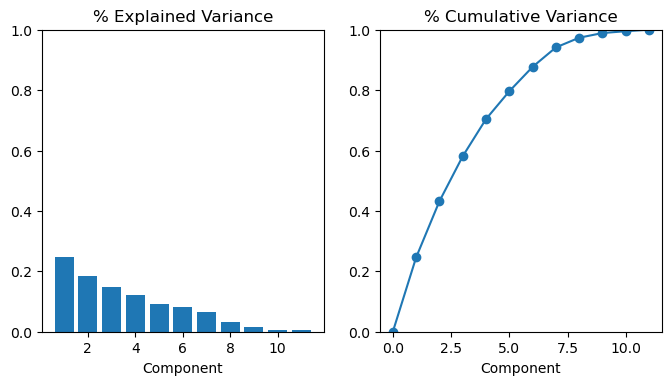

In [53]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


# Look at explained variance
plot_variance(pca);

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24604239, 0.43202653, 0.58098499, 0.70412788, 0.79618563,
       0.87696632, 0.94137442, 0.97352662, 0.98901254, 0.99511144,
       1.        ])

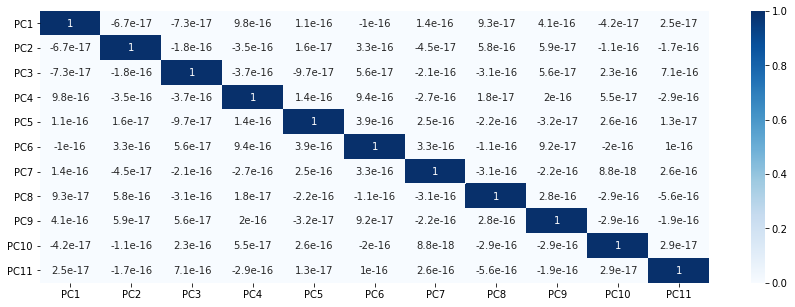

In [55]:
plt.figure(figsize = (15, 5))
sns.heatmap(principalComponents.corr(),annot=True,cmap='Blues')
plt.show()

### Building with PCA components

In [56]:
# model building with components
principalDf = principalComponents.iloc[:,0:8]

Data_for_model = pd.concat([principalDf,clean_df['median_house_value']], axis=1)
Data_for_model

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,median_house_value
0,2.158514,2.053089,-0.740373,2.082665,0.179560,-0.198775,0.317822,0.663970,452600
1,2.479304,0.976504,-1.696171,-0.115461,0.061222,-0.437598,0.713803,0.667265,358500
2,1.953423,2.333946,-0.419160,2.185001,0.377659,-1.281515,0.683875,0.105183,352100
3,0.103649,2.052045,-0.436525,1.422391,0.206044,-0.636368,0.371549,0.913935,341300
4,-0.442801,2.207611,-0.166718,1.173942,0.169754,-0.852811,0.400218,0.021788,342200
...,...,...,...,...,...,...,...,...,...
20635,-1.234046,1.772780,-0.286883,-0.840953,-0.218377,0.275811,-0.516832,-0.740499,78100
20636,0.107132,1.823896,-0.164314,-0.915147,-0.330432,0.661308,-1.172086,-0.260752,77100
20637,-0.488952,1.529275,-0.600386,-1.280987,-0.368552,0.530526,-0.810044,-0.644624,92300
20638,-0.460110,1.658335,-0.471600,-1.148277,-0.402622,0.546215,-0.948918,-0.494190,84700


In [57]:
X = Data_for_model.drop(['median_house_value'], axis=1)
y = Data_for_model['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# initialize regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [58]:
# Calculate and store metrics using the get_metrics function
scores = get_metrics(y_train, y_train_pred, y_test, y_test_pred, "PCA", scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924
5,RFE,53187.531706,5.289753e+09,72730.689326,0.310855,54206.789975,5.665801e+09,75271.516189,0.319014,0.605153
6,RFE-VIF,53497.510668,5.357175e+09,73192.727028,0.312718,54289.058304,5.581157e+09,74707.139538,0.320552,0.600120
7,PCA,58327.055253,6.116683e+09,78209.227566,0.356373,60381.538578,6.992375e+09,83620.419678,0.371920,0.542431


### Split the data into train and validation sets

In [59]:
import statsmodels.api as sm

In [60]:
X_vif

,longitude,latitude,housing_median_age,population,median_income,ocean_proximity,median_house_value,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household
0,-122.23,37.88,41,322,8.3252,NEAR BAY,452600,6.821705,2.555556,6.984127,0.025855,4.924807,1.023810
1,-122.22,37.86,21,2401,8.3014,NEAR BAY,358500,6.418626,2.109842,6.238137,0.003457,2.529694,0.971880
2,-122.24,37.85,52,496,7.2574,NEAR BAY,352100,7.721053,2.802260,8.288136,0.014632,7.165100,1.073446
3,-122.25,37.85,52,558,5.6431,NEAR BAY,341300,5.421277,2.547945,5.817352,0.010113,9.214793,1.073059
4,-122.25,37.85,52,565,3.8462,NEAR BAY,342200,5.810714,2.181467,6.281853,0.006807,13.519838,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,845,1.5603,INLAND,78100,4.451872,2.560606,5.045455,0.001847,16.022560,1.133333
20636,-121.21,39.49,18,356,2.5568,INLAND,77100,4.646667,3.122807,6.114035,0.007182,7.040050,1.315789
20637,-121.22,39.43,17,1007,1.7000,INLAND,92300,4.647423,2.325635,5.205543,0.001688,10.000000,1.120092
20638,-121.32,39.43,18,741,1.8672,INLAND,84700,4.547677,2.123209,5.329513,0.002520,9.640103,1.171920


In [61]:
clean_df_vif = clean_df[X_vif.columns]
one_hot_encoded_data = pd.get_dummies(clean_df_vif)

In [62]:
one_hot_encoded_data

,longitude,latitude,housing_median_age,population,median_income,median_house_value,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,322,8.3252,452600,6.821705,2.555556,6.984127,0.025855,4.924807,1.023810,0,0,0,1,0
1,-122.22,37.86,21,2401,8.3014,358500,6.418626,2.109842,6.238137,0.003457,2.529694,0.971880,0,0,0,1,0
2,-122.24,37.85,52,496,7.2574,352100,7.721053,2.802260,8.288136,0.014632,7.165100,1.073446,0,0,0,1,0
3,-122.25,37.85,52,558,5.6431,341300,5.421277,2.547945,5.817352,0.010113,9.214793,1.073059,0,0,0,1,0
4,-122.25,37.85,52,565,3.8462,342200,5.810714,2.181467,6.281853,0.006807,13.519838,1.081081,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,845,1.5603,78100,4.451872,2.560606,5.045455,0.001847,16.022560,1.133333,0,1,0,0,0
20636,-121.21,39.49,18,356,2.5568,77100,4.646667,3.122807,6.114035,0.007182,7.040050,1.315789,0,1,0,0,0
20637,-121.22,39.43,17,1007,1.7000,92300,4.647423,2.325635,5.205543,0.001688,10.000000,1.120092,0,1,0,0,0
20638,-121.32,39.43,18,741,1.8672,84700,4.547677,2.123209,5.329513,0.002520,9.640103,1.171920,0,1,0,0,0


In [63]:
X = one_hot_encoded_data.drop(['median_house_value'],axis=1)
y = one_hot_encoded_data['median_house_value']  #seperate X and Y

## Split the data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))  #length of each split

Y Target Size: 16512
X Train Size: 16512
X Test  Size: 4128
Y Target Size: 4128


In [65]:
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

,const,longitude,latitude,housing_median_age,population,median_income,rooms_bedroom_ratio,population_per_household,avg_rooms_per_household,income_per_capita,median_age_income_ratio,bedrooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16086,1.0,-122.49,37.73,36,742,5.6204,6.236301,2.489933,6.110738,0.007575,6.405238,0.979866,0,0,0,0,1
8816,1.0,-118.32,33.75,37,366,11.6677,8.000000,2.577465,7.605634,0.031879,3.171148,0.950704,0,0,0,0,1
7175,1.0,-118.19,34.05,47,1193,2.4375,4.821970,4.588462,4.896154,0.002043,19.282051,1.015385,1,0,0,0,0
16714,1.0,-120.68,35.51,17,941,4.3218,5.708054,3.211604,5.805461,0.004593,3.933546,1.017065,1,0,0,0,0
14491,1.0,-117.24,32.85,22,1252,10.0707,7.765625,2.845455,7.906818,0.008044,2.184555,1.018182,0,0,0,0,1


In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,ElasticNet #import necessary modules

### 3.5 Lasso Regression Model

In [67]:
lasso = Lasso(alpha = 1,fit_intercept=False)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)#build a lasso model

lasso_coeff = pd.DataFrame()
lasso_coeff = pd.Series(lasso.coef_,index=X_train.columns)
print(lasso_coeff)

const                         202740.108951
longitude                       -510.976337
latitude                        -466.668300
housing_median_age              1222.159071
population                        -0.445169
median_income                  43898.232500
rooms_bedroom_ratio           -17163.584312
population_per_household        -422.172325
avg_rooms_per_household         3983.155385
income_per_capita            -262402.942575
median_age_income_ratio         -764.088482
bedrooms_per_household        -11959.380002
ocean_proximity_<1H OCEAN    -142229.944218
ocean_proximity_INLAND       -203830.922467
ocean_proximity_ISLAND         48896.037798
ocean_proximity_NEAR BAY     -126881.474377
ocean_proximity_NEAR OCEAN   -123344.484084
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42455404482125.74, tolerance: 92384719767.0765
  model = cd_fast.enet_coordinate_descent(


In [68]:
lasso_coeff = pd.Series(lasso.coef_,index=X_train.columns)
print(lasso_coeff)

const                         202740.108951
longitude                       -510.976337
latitude                        -466.668300
housing_median_age              1222.159071
population                        -0.445169
median_income                  43898.232500
rooms_bedroom_ratio           -17163.584312
population_per_household        -422.172325
avg_rooms_per_household         3983.155385
income_per_capita            -262402.942575
median_age_income_ratio         -764.088482
bedrooms_per_household        -11959.380002
ocean_proximity_<1H OCEAN    -142229.944218
ocean_proximity_INLAND       -203830.922467
ocean_proximity_ISLAND         48896.037798
ocean_proximity_NEAR BAY     -126881.474377
ocean_proximity_NEAR OCEAN   -123344.484084
dtype: float64


In [69]:
#get error metrics
scores = get_metrics(y_train,lasso.predict(X_train),y_test,lasso.predict(X_test),"MLR_Lasso",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924
5,RFE,53187.531706,5.289753e+09,72730.689326,0.310855,54206.789975,5.665801e+09,75271.516189,0.319014,0.605153
6,RFE-VIF,53497.510668,5.357175e+09,73192.727028,0.312718,54289.058304,5.581157e+09,74707.139538,0.320552,0.600120
7,PCA,58327.055253,6.116683e+09,78209.227566,0.356373,60381.538578,6.992375e+09,83620.419678,0.371920,0.542431
8,MLR_Lasso,52268.806881,5.140172e+09,71694.990202,0.296948,53489.365074,5.577986e+09,74685.916008,0.296321,0.612483


In [70]:
# get coefficients
lassodf = pd.DataFrame(lasso_coeff).rename(columns={0:'lasso'})
coefficients = pd.DataFrame(lassodf)
coefficients

,lasso
const,202740.108951
longitude,-510.976337
latitude,-466.668300
housing_median_age,1222.159071
population,-0.445169
median_income,43898.232500
rooms_bedroom_ratio,-17163.584312
population_per_household,-422.172325
avg_rooms_per_household,3983.155385
income_per_capita,-262402.942575


### 3.6 Ridge Regression Model

In [71]:
ridgeR = Ridge(alpha = 1,fit_intercept=False)
ridgeR.fit(X_train, y_train) #build ridge model
y_pred = ridgeR.predict(X_test)

ridge_coefficient = pd.DataFrame()
ridge_coefficient= pd.Series(ridgeR.coef_,index=X_train.columns)
print(ridge_coefficient)

const                        -648425.647756
longitude                     -10642.848751
latitude                      -10062.822051
housing_median_age              1171.131054
population                        -0.574443
median_income                  43174.547319
rooms_bedroom_ratio           -17137.989593
population_per_household        -413.272787
avg_rooms_per_household         4541.192673
income_per_capita            -219796.332077
median_age_income_ratio         -749.153191
bedrooms_per_household        -12516.656147
ocean_proximity_<1H OCEAN    -161603.632749
ocean_proximity_INLAND       -212688.241651
ocean_proximity_ISLAND         21361.984577
ocean_proximity_NEAR BAY     -149438.671423
ocean_proximity_NEAR OCEAN   -146057.086505
dtype: float64


In [72]:
#get error metrics
scores = get_metrics(y_train,ridgeR.predict(X_train),y_test,ridgeR.predict(X_test),"MLR_Ridge",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924
5,RFE,53187.531706,5.289753e+09,72730.689326,0.310855,54206.789975,5.665801e+09,75271.516189,0.319014,0.605153
6,RFE-VIF,53497.510668,5.357175e+09,73192.727028,0.312718,54289.058304,5.581157e+09,74707.139538,0.320552,0.600120
7,PCA,58327.055253,6.116683e+09,78209.227566,0.356373,60381.538578,6.992375e+09,83620.419678,0.371920,0.542431
8,MLR_Lasso,52268.806881,5.140172e+09,71694.990202,0.296948,53489.365074,5.577986e+09,74685.916008,0.296321,0.612483
9,MLR_Ridge,51782.328647,5.049852e+09,71062.310426,0.294587,53002.734277,5.473356e+09,73982.133347,0.293738,0.619292


In [73]:
#get coefficients
ridgedf = pd.DataFrame(ridge_coefficient).rename(columns={0:'ridge_coef'})
coefficients = pd.concat([coefficients, ridgedf])
coefficients

,lasso,ridge_coef
const,202740.108951,NaN
longitude,-510.976337,NaN
latitude,-466.668300,NaN
housing_median_age,1222.159071,NaN
population,-0.445169,NaN
median_income,43898.232500,NaN
rooms_bedroom_ratio,-17163.584312,NaN
population_per_household,-422.172325,NaN
avg_rooms_per_household,3983.155385,NaN
income_per_capita,-262402.942575,NaN


### 3.6 Elastic Net Model

In [74]:
e_net = ElasticNet(alpha = 1,fit_intercept=True)
e_net.fit(X_train, y_train)
y_pred2 = e_net.predict(X_test)# build a elastic net model

e_net_coeff = pd.DataFrame()
e_net_coeff= pd.Series(e_net.coef_,index=X_train.columns)
print(e_net_coeff)

const                             0.000000
longitude                    -13548.019842
latitude                     -13529.965849
housing_median_age             2169.840404
population                        1.063510
median_income                 32016.605531
rooms_bedroom_ratio           -4256.313523
population_per_household       -414.801008
avg_rooms_per_household         735.618728
income_per_capita               -71.544693
median_age_income_ratio       -2695.178953
bedrooms_per_household           36.745845
ocean_proximity_<1H OCEAN      5744.222600
ocean_proximity_INLAND       -15276.012270
ocean_proximity_ISLAND           92.301989
ocean_proximity_NEAR BAY       4016.780220
ocean_proximity_NEAR OCEAN     5419.707454
dtype: float64


In [75]:
#get error metrics
scores = get_metrics(y_train,e_net.predict(X_train),y_test,e_net.predict(X_test),"MLR_ElasticNet",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924
5,RFE,53187.531706,5.289753e+09,72730.689326,0.310855,54206.789975,5.665801e+09,75271.516189,0.319014,0.605153
6,RFE-VIF,53497.510668,5.357175e+09,73192.727028,0.312718,54289.058304,5.581157e+09,74707.139538,0.320552,0.600120
7,PCA,58327.055253,6.116683e+09,78209.227566,0.356373,60381.538578,6.992375e+09,83620.419678,0.371920,0.542431
8,MLR_Lasso,52268.806881,5.140172e+09,71694.990202,0.296948,53489.365074,5.577986e+09,74685.916008,0.296321,0.612483
9,MLR_Ridge,51782.328647,5.049852e+09,71062.310426,0.294587,53002.734277,5.473356e+09,73982.133347,0.293738,0.619292


In [76]:
#get coefficients
enet = pd.DataFrame(e_net_coeff).rename(columns={0:'enet'})
coefficients = pd.concat([coefficients, enet])
coefficients

,lasso,ridge_coef,enet
const,202740.108951,NaN,NaN
longitude,-510.976337,NaN,NaN
latitude,-466.668300,NaN,NaN
housing_median_age,1222.159071,NaN,NaN
population,-0.445169,NaN,NaN
median_income,43898.232500,NaN,NaN
rooms_bedroom_ratio,-17163.584312,NaN,NaN
population_per_household,-422.172325,NaN,NaN
avg_rooms_per_household,3983.155385,NaN,NaN
income_per_capita,-262402.942575,NaN,NaN


**Top 5 important features**

In this we used the Lasso regression model to select the top 5 features since LASSO makes some the variables coefficients to 0 which help us to reduce the number of variables whereas Ridge does not make its variables coefficents to 0 which is why it is not preferred than LASSO for feature selection

In [77]:
(lasso_coeff>0).value_counts()

False    12
True      5
dtype: int64

In [78]:
# selects top 5 variables
top_features_lasso = np.argsort(np.abs(lasso_coeff))[::-1][5]
top_features_lasso

16

In [79]:
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_ Test,MAPE_Test,R^2
0,K-Fold 1,49937.843232,4.694440e+09,68515.982701,0.296230,52320.657758,5.303247e+09,72823.395534,0.311173,0.648824
1,K-Fold 2,50379.138392,4.776109e+09,69109.397852,0.300912,50953.811847,4.787220e+09,69189.737224,0.302284,0.638899
2,K-Fold 3,50784.197449,4.815133e+09,69391.157412,0.302914,49804.033287,4.641837e+09,68131.025245,0.297642,0.640435
3,K-Fold 4,50949.922135,4.870874e+09,69791.644922,0.303020,49068.626458,4.482196e+09,66949.205788,0.296905,0.634087
4,K-Fold 5,50208.104533,4.688633e+09,68473.590640,0.300774,51612.722599,5.162020e+09,71847.198494,0.304850,0.646924
5,RFE,53187.531706,5.289753e+09,72730.689326,0.310855,54206.789975,5.665801e+09,75271.516189,0.319014,0.605153
6,RFE-VIF,53497.510668,5.357175e+09,73192.727028,0.312718,54289.058304,5.581157e+09,74707.139538,0.320552,0.600120
7,PCA,58327.055253,6.116683e+09,78209.227566,0.356373,60381.538578,6.992375e+09,83620.419678,0.371920,0.542431
8,MLR_Lasso,52268.806881,5.140172e+09,71694.990202,0.296948,53489.365074,5.577986e+09,74685.916008,0.296321,0.612483
9,MLR_Ridge,51782.328647,5.049852e+09,71062.310426,0.294587,53002.734277,5.473356e+09,73982.133347,0.293738,0.619292


The value of 
- MAPE - 0.293 
- R2 - 0.612 is provided by **MLR ridge**

The Ridge model has the lowest MAPE when compared to other models, which is what we are looking for.As a result, we will base our future projections on this model.
